#Assignment 3 (group work): data of CitiBike 201501
test if the distribution of trip duration is the same for seniors (older than 60) and young (younger than 30) riders   
  
  
$KS$, Pearson's tests  
    
test if mean of the trip duration for different groups are significantly different from each other (with critical value of 0.05)  

I would like to regress duration on a $dummy$ variable to catogerize that two group.
    

In [4]:
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats as st
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
df=pd.read_csv('201502-citibike-tripdata.csv')
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [6]:
df['age'] = 2015-df['birth year']

In [7]:
df['tripyoung'] = df['tripduration'][(df['age'] <= 30)]
df['tripsenior'] = df['tripduration'][(df['age'] >= 60)]

# I choose the interval of 50 to display the tripduration of two groups and cut off the data with duration longer than 2500 (not so valid, just observe that the tails from that point is thin)

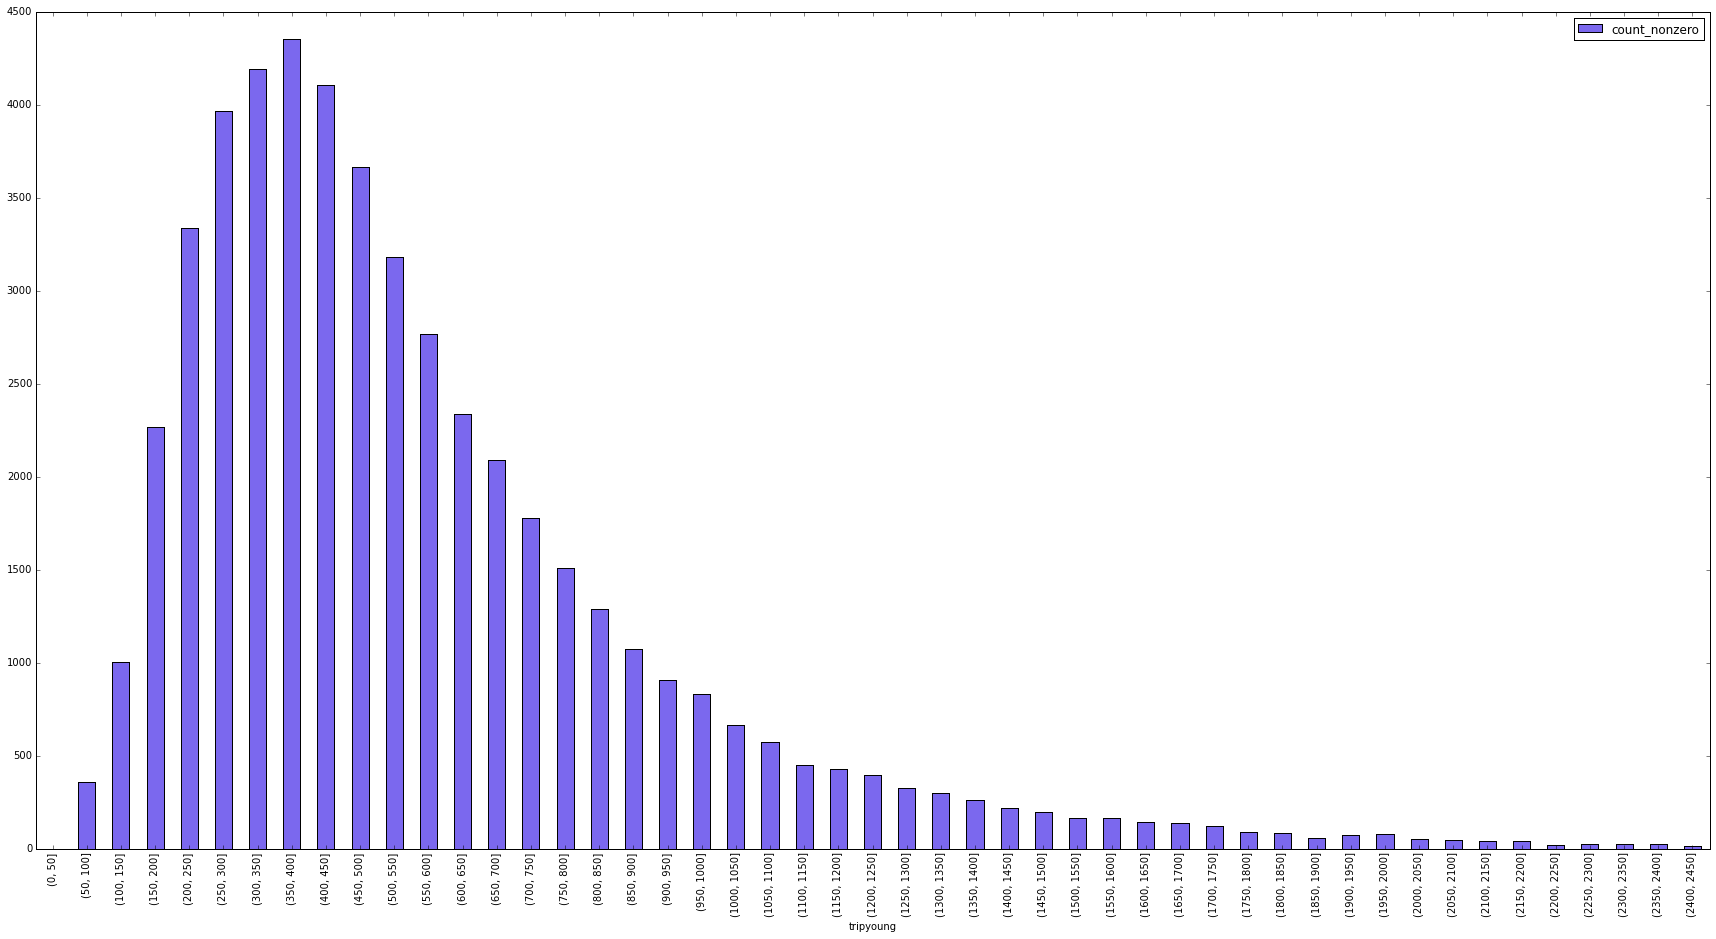

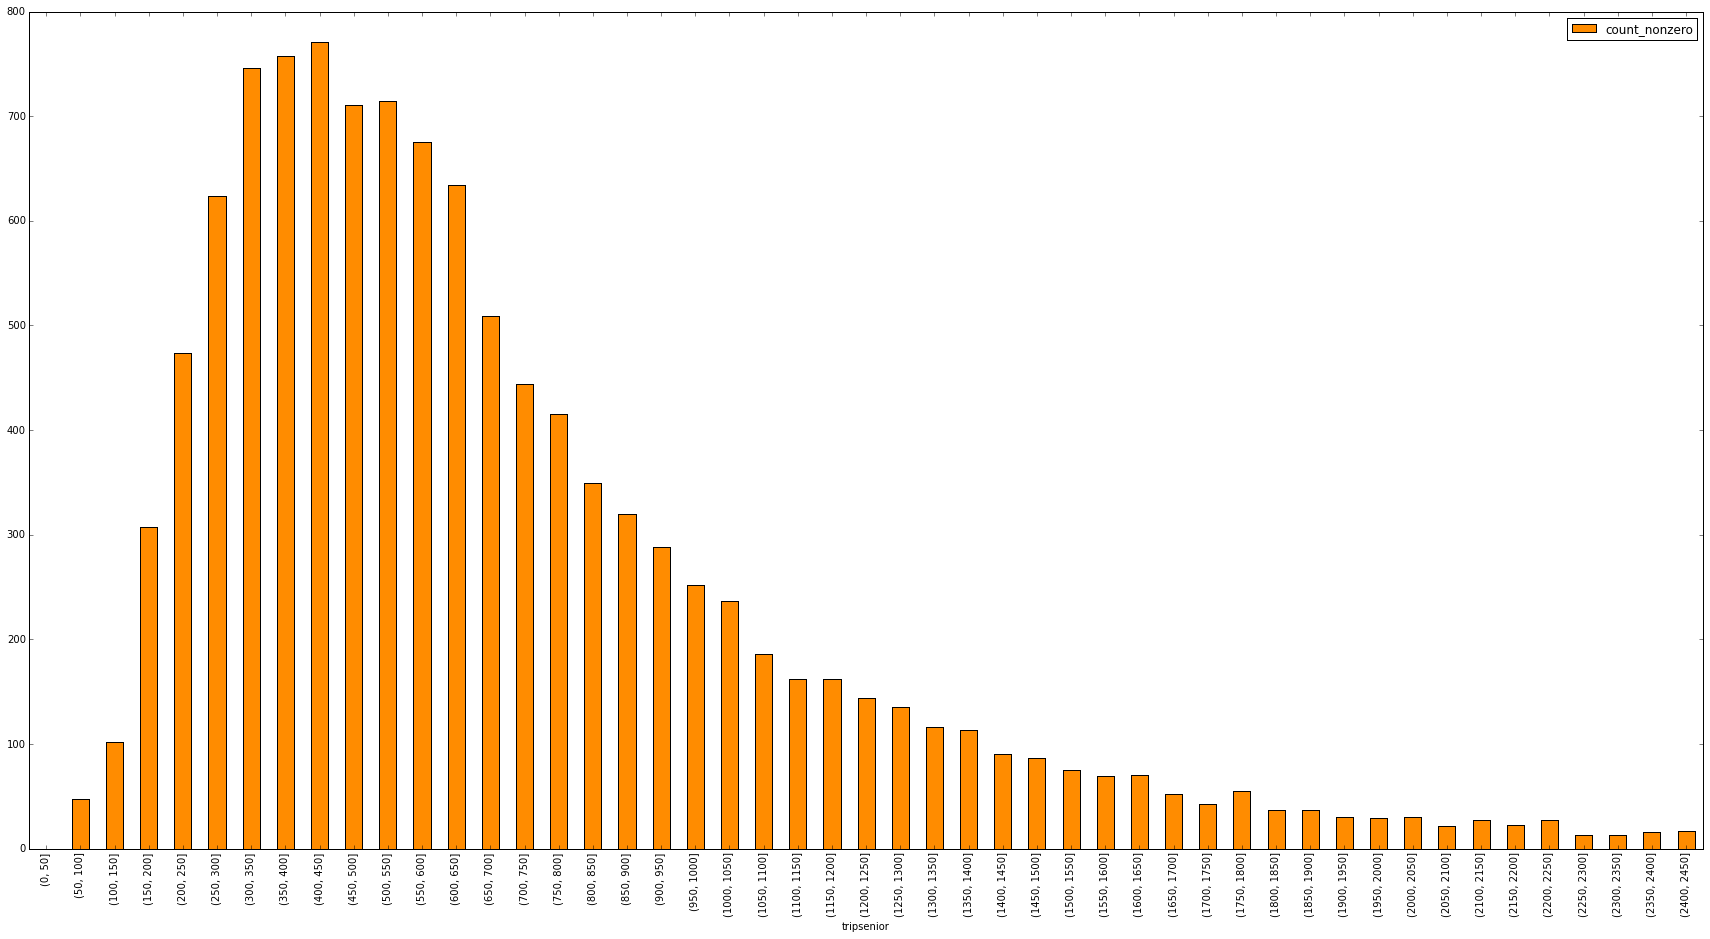

In [8]:
bins = np.arange(0, 2500, 50)
df.tripyoung.groupby(pd.cut(df.tripyoung, bins)).agg([count_nonzero]).plot(kind='bar',color='#7b68ee',figsize=(30,15))
df.tripsenior.groupby(pd.cut(df.tripsenior, bins)).agg([count_nonzero]).plot(kind='bar',color='#ff8c00',figsize=(30,15))

# K-S test

In [9]:
import scipy.stats

In [10]:
test = df.tripyoung     #for the K-S test, should wipe out the 'NaN'
test = test[~numpy.isnan(test)]
test1 = df.tripsenior     
test1 = test1[~numpy.isnan(test1)]

In [11]:
print scipy.stats.ks_2samp(test, test1)

Ks_2sampResult(statistic=0.1456387864904114, pvalue=2.9754165347033199e-172)


# The p-value is near 0, so the Null Hypothesis of the two distributions are derived from the same distribution is NOT true. 

#Pearson's test & Spearman test

In [12]:
print len(test1), len(test)

11405 50483


In [13]:
rows = np.random.choice(test.index.values, 16822)
print type(test.index.values)
sampled_test = test.ix[rows]

<type 'numpy.ndarray'>


In [14]:
x = pd.DataFrame(test1)
sort_1 = x.sort('tripsenior', ascending=False)
y = pd.DataFrame(sampled_test)
sort_2 = y.sort('tripyoung', ascending=False)

/Users/tianyigu/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from IPython.kernel.zmq import kernelapp as app
/Users/tianyigu/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [15]:
st.pearsonr(sort_1, sort_2)

ValueError: operands could not be broadcast together with shapes (11405,1) (16822,1) 

In [60]:
st.spearmanr(sort_1, sort_2)

SpearmanrResult(correlation=0.99999868079869259, pvalue=0.0)

#With the P-value, the Null hypothesis that two datasets are uncorrelated can be rejected. 

In [61]:
df['twosample'] = df['tripduration'][(df['age'] <= 30) | (df['age'] >= 60)]
test0 = df    #for the K-S test, should wipe out the 'NaN'
test0 = test0[~numpy.isnan(test0.twosample)]

In [62]:
test0['dummy'] = pd.get_dummies(test0['age'] <= 30)[1]

/Users/mading/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [63]:
import statsmodels.formula.api as smf
mod = smf.ols(formula='tripduration ~ dummy', data = test0).fit()
print
print(mod.summary())


                            OLS Regression Results                            
Dep. Variable:           tripduration   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     251.0
Date:                Fri, 09 Oct 2015   Prob (F-statistic):           1.92e-56
Time:                        18:38:29   Log-Likelihood:            -6.9657e+05
No. Observations:               84926   AIC:                         1.393e+06
Df Residuals:                   84924   BIC:                         1.393e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    723.8613      6.807    106.340      0.

#The coefficient of the dummy variable is significant, so the trip duration for different groups are significantly different from each other

In [64]:
st.describe(test) # young

DescribeResult(nobs=68104, minmax=(60.0, 42878.0), mean=603.43912251850111, variance=788817.63824797678, skewness=27.204072826169654, kurtosis=1020.9380815237987)

In [65]:
st.describe(test1) # senior

DescribeResult(nobs=16822, minmax=(60.0, 39063.0), mean=723.86131256687668, variance=741549.00347436056, skewness=21.22237467258945, kurtosis=726.3134007581575)

# As to the young people, the mean is less than the senior, skewness is higher, so it is more left-skewed, and the kurtosis is higher, so it is more concentrated and less fat-tailed.